In [ ]:
data = {
    'Review': [
        'At McDonald\'s the food was ok and the service was bad.',
        'I would not recommend this Japanese restaurant to anyone.',
        'I loved this restaurant when I traveled to Thailand last summer.',
        'The menu of Loving has a wide variety of options.',
        'The staff was friendly and helpful at Google\'s employees restaurant.',
        'The ambiance at Bella Italia is amazing, and the pasta dishes are delicious.',
        'I had a terrible experience at Pizza Hut. The pizza was burnt, and the service was slow.',
        'The sushi at Sushi Express is always fresh and flavorful.',
        'The steakhouse on Main Street has a cozy atmosphere and excellent steaks.',
        'The dessert selection at Sweet Treats is to die for!'
    ]
}

## Exercise 1: Exploring Text Preprocessing usage, NER and POS tags
1. Create a function preprocess_text() wich will receive the data as argument and:

- convert all the text in lower case and tokanize it
- remove punctuation
- apply a lemmatizer
- return the preprocessed strings


important:

after creating each function, apply it in the dataset and print the result to check that is working properly


2. Create a new dataset with the cleaned text

hint: keep two datasets: the raw data and the preprocessed data



3. Create a function perform_ner() that will receive the text as argument and perform NER tagging on it. Use spacy en_core_web_sm

hint: the function should return the entities text and label_ (example of _labels: ORG, GPE, DATE)



4. Create a function perform_pos_tagging() that will receive the text as argument and perform POS tagging on it.

hint: use nltk pos_tag method



5. Let’s apply the functions in the dataset, analyse the outputs applying it in the preprocessed data and in the raw data

hint: to understand the meaning of the different POS tags you can use:





```
nltk.download('tagsets')
nltk.help.upenn_tagset('NN')
```



In [ ]:
import pandas as pd
import nltk
import spacy
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk import pos_tag
import re
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [ ]:
def preprocess_text(data):
    # Remove punctuation
    data = re.sub(r'[^\w\s]', '', data)

    # Remove newlines
    data = data.replace('\n', ' ')

    # Convert to lowercase
    data = data.lower()

    # Tokenize data
    tokens = word_tokenize(data)

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join the lemmatized tokens back into a string
    preprocessed_text = ' '.join(lemmatized_tokens)

    return preprocessed_text

data = pd.DataFrame(data)
df = data['Review'].apply(preprocess_text)
df

,Review
0,at mcdonalds the food wa ok and the service wa...
1,i would not recommend this japanese restaurant...
2,i loved this restaurant when i traveled to tha...
3,the menu of loving ha a wide variety of option
4,the staff wa friendly and helpful at google em...
5,the ambiance at bella italia is amazing and th...
6,i had a terrible experience at pizza hut the p...
7,the sushi at sushi express is always fresh and...
8,the steakhouse on main street ha a cozy atmosp...
9,the dessert selection at sweet treat is to die...


In [ ]:
def perform_ner(text):
    # Load the spaCy model
    nlp = spacy.load("en_core_web_sm")

    # Process the text with spaCy
    doc = nlp(text)

    # Extract the entities and their labels
    entities = [(ent.text, ent.label_) for ent in doc.ents]

    return entities

df_spacy = df.apply(perform_ner)
df_spacy

,Review
0,[]
1,"[(japanese, NORP)]"
2,"[(thailand, GPE), (last summer, DATE)]"
3,[]
4,"[(google, ORG)]"
5,"[(bella italia, ORG)]"
6,[]
7,"[(sushi express, ORG)]"
8,[]
9,[]


In [ ]:
def perform_pos_tagging(text):
    # Tokenize the text
    tokens = word_tokenize(text)

    # Perform POS tagging
    pos_tags = pos_tag(tokens)

    return pos_tags

df_pos = df.apply(perform_pos_tagging)
df_pos

,Review
0,"[(at, IN), (mcdonalds, PDT), (the, DT), (food,..."
1,"[(i, NN), (would, MD), (not, RB), (recommend, ..."
2,"[(i, NN), (loved, VBD), (this, DT), (restauran..."
3,"[(the, DT), (menu, NN), (of, IN), (loving, VBG..."
4,"[(the, DT), (staff, NN), (wa, VBZ), (friendly,..."
5,"[(the, DT), (ambiance, NN), (at, IN), (bella, ..."
6,"[(i, NN), (had, VBD), (a, DT), (terrible, JJ),..."
7,"[(the, DT), (sushi, NN), (at, IN), (sushi, NN)..."
8,"[(the, DT), (steakhouse, NN), (on, IN), (main,..."
9,"[(the, DT), (dessert, JJ), (selection, NN), (a..."


In [ ]:
print(nltk.help.upenn_tagset())

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

## Exercise 2: Plotting the word embeddings
1. Create the word embeddings using Word2Vec model to vectorize the text.

hint: use the preprocessed and tokenized dataset and use Word2Vec model from gensim.models

Print the dimensions of the Word2Vec object and analyse it. What is the vector dimensions? What it means?



2. Create a function plot_word_embeddings() that receives the word2vec object as argument and plots the embeddings dimensions in a grided plot. Use a scatter plot. Loop through the words and use annotate() method to add text labels to each point on the scatter plot.
Finally call this function to see the plots and analyse it:

Are the related words close to each other?
What can be the possible reasons for this output?


3. To enhance the analysis, you can:

- Experiment with different preprocessing techniques.
- Fine-tune the Word2Vec model parameters.
- Explore advanced visualization techniques for word embeddings.

In [ ]:
from gensim.models import Word2Vec

# Tokenize the preprocessed text
tokenized_text = df.apply(word_tokenize)

# Train the Word2Vec model
model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=1, workers=4)

# Print the dimensions of the Word2Vec object
print("Word2Vec Dimensions:", model.wv.vectors.shape)


Word2Vec Dimensions: (72, 100)


<Figure size 800x800 with 0 Axes>

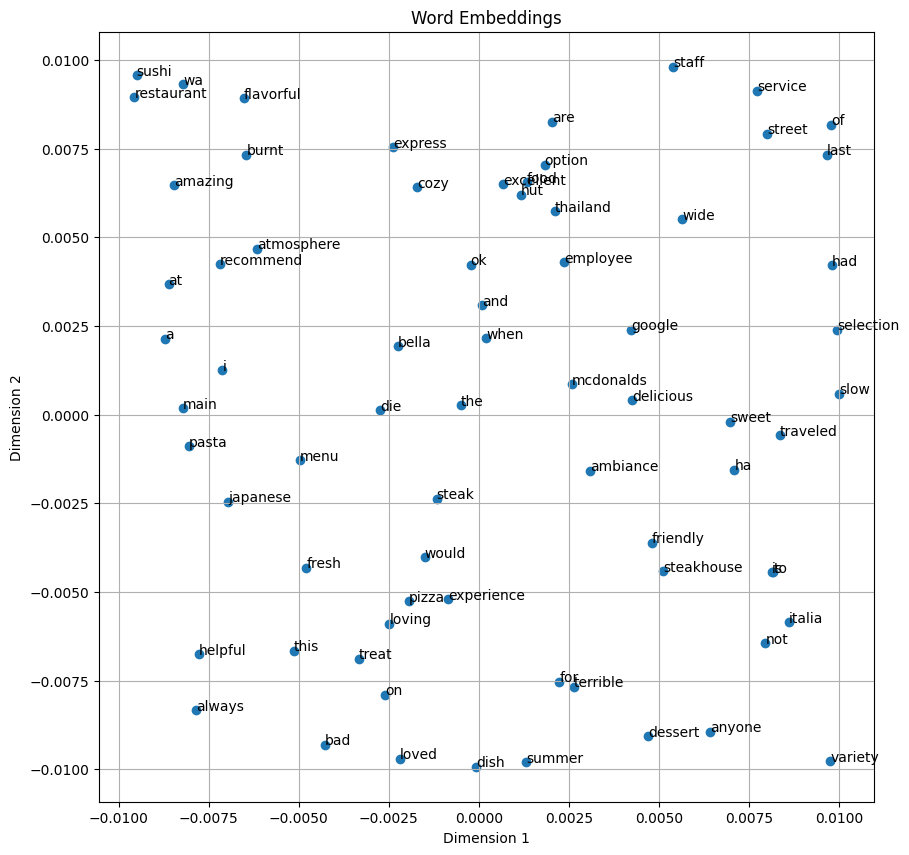

In [ ]:
import matplotlib.pyplot as plt

def plot_word_embeddings(word2vec_model):
    # Get the list of words in the vocabulary
    words = list(word2vec_model.wv.index_to_key)

    # Get the embeddings for the words
    embeddings = word2vec_model.wv.vectors.tolist()

    # Create a DataFrame with the words and their embeddings
    df = pd.DataFrame({'word': words, 'embedding': embeddings})
    plt.figure(figsize=(8, 8))

  # Plot the embeddings using a scatter plot
    plt.figure(figsize=(10, 10))
    plt.scatter(df['embedding'].apply(lambda x: x[0]), df['embedding'].apply(lambda x: x[1]))
    for i, word in enumerate(words):
        plt.annotate(word, xy=(df['embedding'][i][0], df['embedding'][i][1]))
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Word Embeddings')
    plt.grid(True)
    plt.show()

    return df

df_plot = plot_word_embeddings(model)